In [1]:
# this first two lines are for deactivating the GPU usage
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"
#----------------------------------------
import time

Classification of the MNIST digits data using a convolutional network. 

In [2]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
          

Using TensorFlow backend.


We have to explicitly put the input size of our data, without inclusing the batch dimension:  `(image_height, image_width,
image_channels) = (28, 28, 1)`. 

In the convolutional layer, we specify the depth of the layer (the number of convolutions we want to use), `32` in the first layer; and also the kernel size of the convolution `3x3` for all our convolutional layers. We could also specify a stride parameter (steps of the kernel when sliding through the input image), but it's better to keep it a its default value of 1. 

The max-pooling layer also uses a kernel, that defines the size of the max-pooling operation. In this case, we are using a `2x2` window that gets the maximum value inside the window and discards all the rest. It has by default, a stride of `2`.

No we add the classifier layers on top of the convnet:

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

We flatten out our 3D layer `(3, 3, 64)` into a vector of shape `(576,)` before passing it to the Dense layers. 

Now we can train the network:

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
start = time.perf_counter()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

Epoch 1/5
60000/60000 [==============================] - 26s 428us/step - loss: 0.1738 - acc: 0.9452
Epoch 2/5
60000/60000 [==============================] - 22s 361us/step - loss: 0.0460 - acc: 0.9852
Epoch 3/5
60000/60000 [==============================] - 20s 341us/step - loss: 0.0312 - acc: 0.9904
Epoch 4/5
60000/60000 [==============================] - 20s 338us/step - loss: 0.0233 - acc: 0.9926
Epoch 5/5
60000/60000 [==============================] - 20s 337us/step - loss: 0.0178 - acc: 0.9944
Elapsed 108.874 seconds.


CPU: 357.670 seconds.  
GPU: 108.874 seconds. Much better with GPU when training convnets.

We can evaluate the model on the test data. 

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 186us/step


0.992

We have a test accuracy of about 99.2%. 

In [9]:
history.history

{'loss': [0.17383607447793087,
  0.04596929386413346,
  0.031245889989829932,
  0.023314210341331392,
  0.017771178159136616],
 'acc': [0.94515, 0.9851833333333333, 0.99035, 0.99265, 0.9944166666666666]}

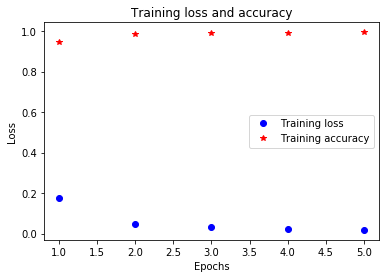

In [10]:
import matplotlib.pyplot as plt

loss_conv = history.history['loss']
acc_conv = history.history['acc']
epochs = range(1, len(loss_conv) + 1)
plt.plot(epochs, loss_conv, 'bo', label='Training loss')
plt.plot(epochs, acc_conv, 'r*', label='Training accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()